<a href="https://colab.research.google.com/github/VimalChamyal/Sales-insights-data-analysis-project/blob/main/sales_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
from google.colab import files
uploaded = files.upload()

Saving ECOMM DATA.xlsx to ECOMM DATA (2).xlsx


In [17]:
import io
df = pd.read_excel(io.BytesIO(uploaded['ECOMM DATA (2).xlsx']))

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [53]:
df.shape

(51290, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [55]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [24]:
# Checking the duplicates

df.duplicated().sum()

0

In [25]:
# Checking the missing values

df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [26]:
df.drop('Postal Code', axis=1, inplace=True)

In [28]:
# Removing the column postal code which has many null values

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [30]:
# Checking the unique values in each column

n = df.nunique(axis=0)

print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             24988
Quantity             14
Discount             27
Profit            27085
Shipping Cost     16936
Order Priority        4
dtype: int64


EDA

In [33]:
df['Ship Mode'].value_counts()

# We can see that Standard class ship mode is the most preffered

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [37]:
import matplotlib.pyplot as plt

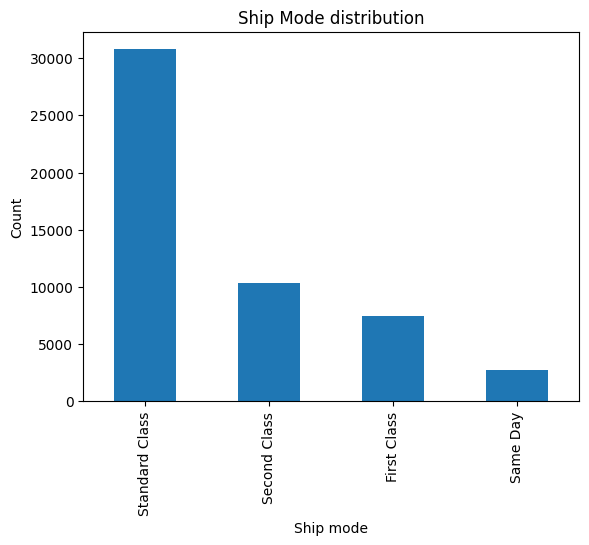

In [40]:
df['Ship Mode'].value_counts().plot(kind="bar")
plt.title("Ship Mode distribution")
plt.xlabel("Ship mode")
plt.ylabel("Count")
plt.show()

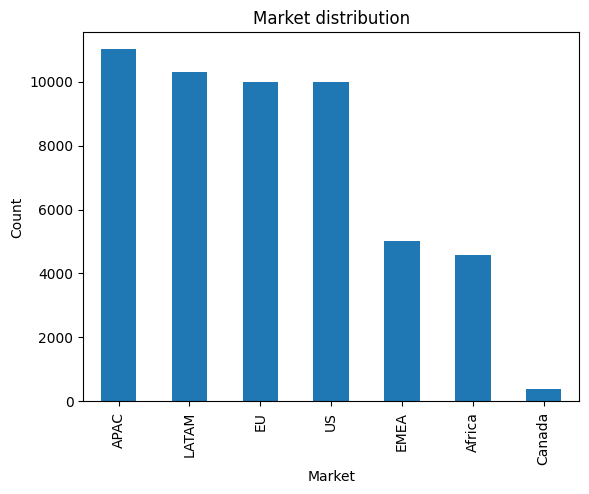

In [43]:
df['Market'].value_counts().plot(kind="bar")
plt.title("Market distribution")
plt.xlabel("Market")
plt.ylabel("Count")
plt.show()

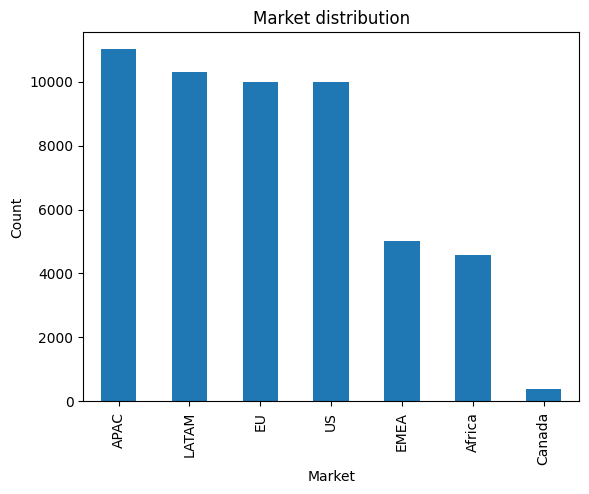

In [52]:
df['Market'].value_counts().plot(kind="bar")
plt.title("Market distribution")
plt.xlabel("Market")
plt.ylabel("Count")
plt.show()

<Axes: >

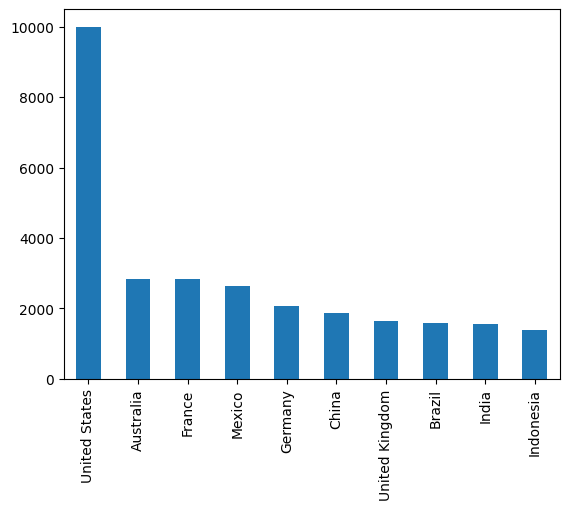

In [51]:
top_countries = df['Country'].value_counts()[:10]

#create bar chart of top 10 countries
top_countries.plot(kind='bar')

<ipython-input-57-9d2f6b4daefc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


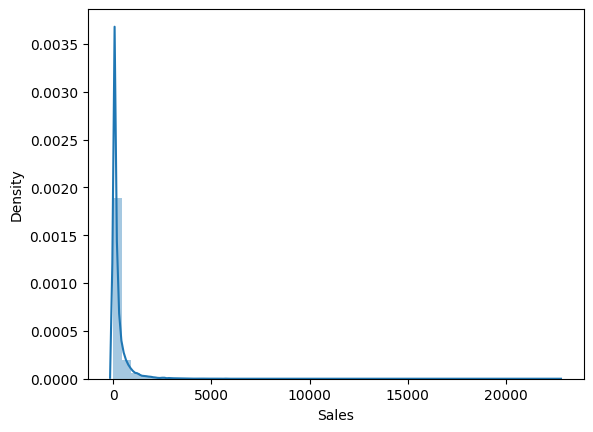

In [57]:
import seaborn as sns

sns.distplot(df['Sales'])
plt.show()

(0.0, 1300.0)

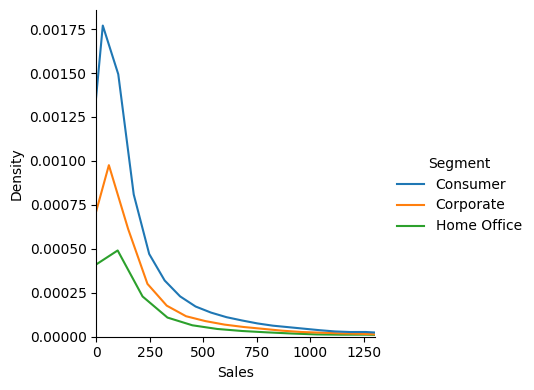

In [64]:
import seaborn as sns

p = sns.displot(data=df, x='Sales', hue='Segment', height=4, kind='kde')
plt.xlim(0,1300)

(0.0, 500.0)

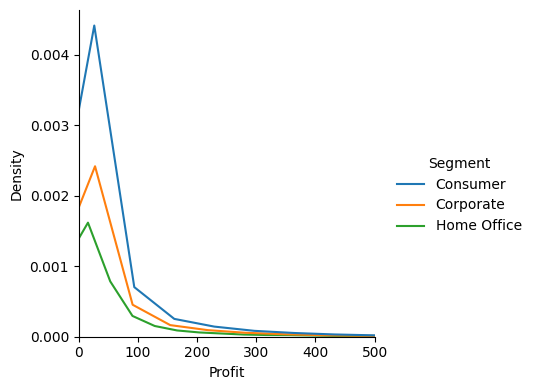

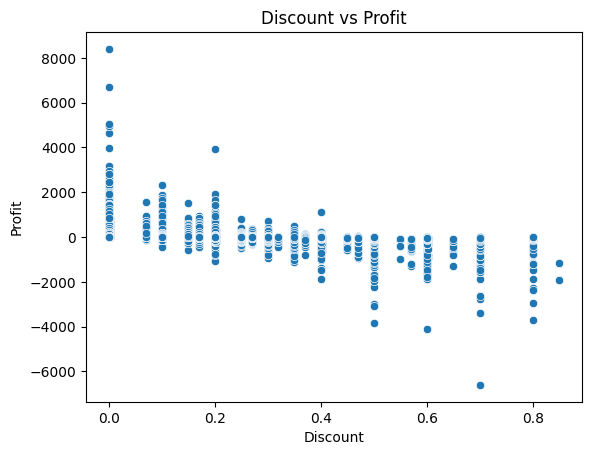

In [72]:
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
plt.title('Discount vs Profit')
plt.show()


Market Analysis

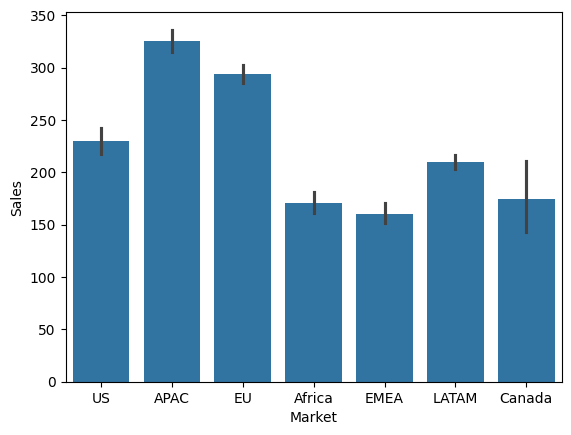

In [74]:

sns.barplot(data=df, x="Market", y="Sales")
plt.show()

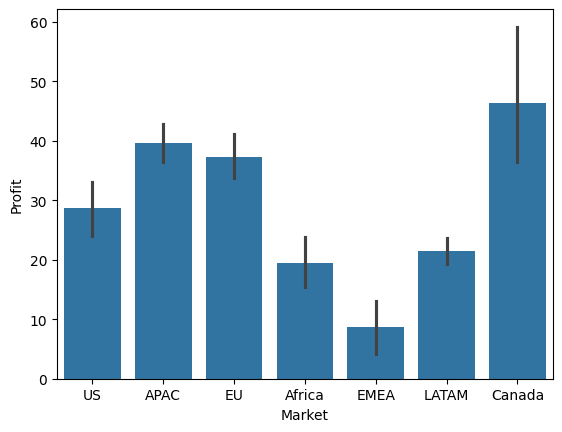

In [75]:
sns.barplot(data=df, x="Market", y="Profit")
plt.show()

Category analysis

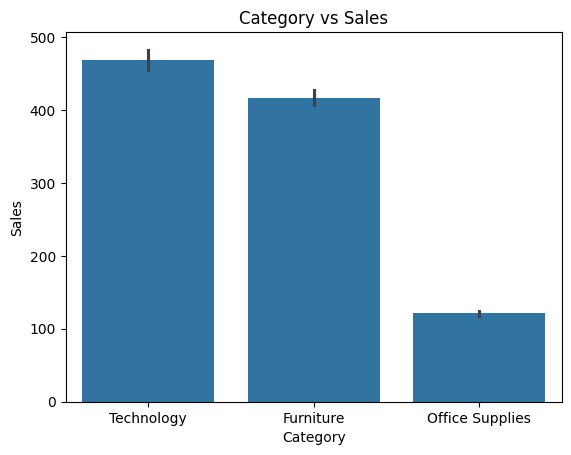

In [77]:
sns.barplot(data = df, x = "Category", y ="Sales")
plt.title('Category vs Sales')
plt.show()

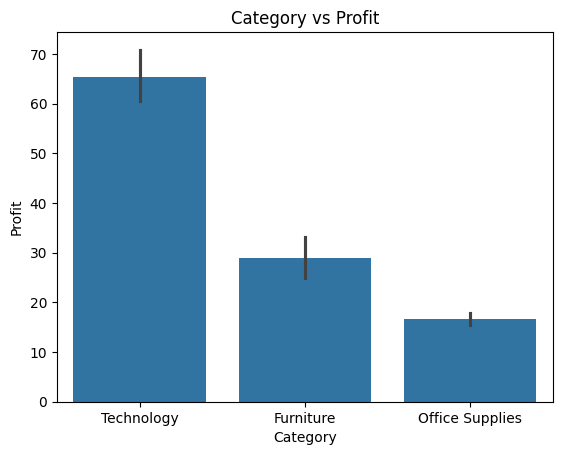

In [79]:
sns.barplot(data = df, x = "Category", y ="Profit")
plt.title('Category vs Profit')
plt.show()

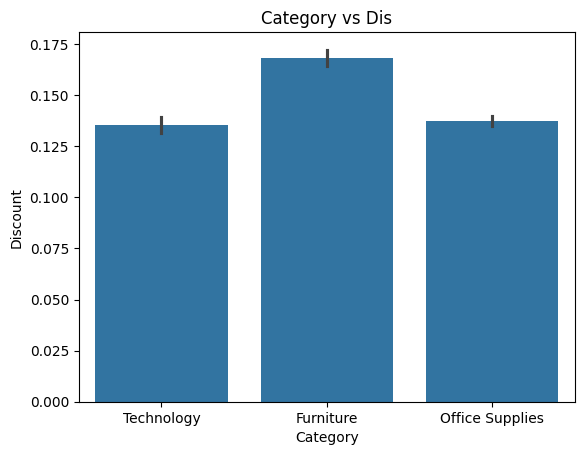

In [80]:
sns.barplot(data = df, x = "Category", y ="Discount")
plt.title('Category vs Dis')
plt.show()